## Exercise 2.3 Complex Machine Learning Models and Keras (Random Forest)

### 01. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path for importing the data

path = r'C:\Users\dmksk\OneDrive\Desktop\CF\Macine Learning with Python\Ex 2.3'

In [5]:
# Import data

unscaled = pd.read_csv(os.path.join(path, 'Data', 'Dataset_weather.csv'))

In [6]:
unscaled.shape

(22950, 170)

In [8]:
unscaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   
1                 0             1.1              6.1             3.3   
2                 0             0.0              8.5             5.1   
3                 0             4.1              6.3             3.8   
4                 0             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   
1                   8           

In [9]:
# Import data

pleasant = pd.read_csv(os.path.join(path, 'Data', 'Pleasant_Weather.csv'))

In [10]:
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

### 02. Preprocessing: Cleaning, Wrangling, Reshaping and Splitting the Data

#### Preprocessing for Random Forest 1 (2010s Weather Data)

In [11]:
# Drop the columns related to Tours, Gdansk and Rome from the unscaled dataset
# Every set of observations needs to be the same length. Three of the weather stations don’t have enough and need to be dropped from the data set. You’ll find them already removed from the predictions data set.

unscaled = unscaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [12]:
unscaled.shape

(22950, 149)

In [13]:
# Extract the different observation types

observation_types = ['cloud_cover', 'wind_speed', 'humidity', 'pressure',
                     'global_radiation', 'precipitation', 'snow_depth', 
                     'sunshine', 'temp_mean', 'temp_min', 'temp_max']

In [14]:
# Two types of observations are missing multiple years for most weather stations. Remove them.
# Create a dictionary to store the count of stations for each observation type
station_counts = {}

for obs in observation_types:
    # Select columns related to the current observation type
    columns = [col for col in unscaled.columns if col.endswith(obs)]
    
    # Count the number of stations (i.e., the number of columns) for the current observation type
    station_counts[obs] = len(columns)

# Print the count of stations for each observation type
print("Number of stations covered by each observation type:")
for obs, count in station_counts.items():
    print(f"{obs}: {count} stations")

Number of stations covered by each observation type:
cloud_cover: 14 stations
wind_speed: 9 stations
humidity: 14 stations
pressure: 14 stations
global_radiation: 15 stations
precipitation: 15 stations
snow_depth: 6 stations
sunshine: 15 stations
temp_mean: 15 stations
temp_min: 15 stations
temp_max: 15 stations


In [15]:
# Drop columns that end with wind_speed and snow_depth from the dataset

columns_to_drop = unscaled.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
       'KASSEL_wind_speed', 'LJUBLJANA_wind_speed', 'MAASTRICHT_wind_speed',
       'MADRID_wind_speed', 'MUNCHENB_snow_depth', 'OSLO_wind_speed',
       'OSLO_snow_depth', 'SONNBLICK_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [16]:
unscaled = unscaled.drop(columns=columns_to_drop)

In [17]:
unscaled.shape

(22950, 134)

In [18]:
# Create a list of all unique station names in the dataset

all_stations = set([col.split('_')[0] for col in unscaled.columns if '_' in col])
all_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [19]:
observation_types = ['cloud_cover', 'humidity', 'pressure']

missing_stations_by_observation = {}

for obs in observation_types:
    # Select columns related to the current observation type
    columns = [col for col in unscaled.columns if col.endswith(obs)]
    
    # Extract station names by removing the observation type from the column names
    station_names = set([col.replace(f'_{obs}', '') for col in columns])
    
    # Identify stations that are in all_stations but missing from the current observation type
    missing_stations = all_stations - station_names
    
    # Store the missing station names in the dictionary
    missing_stations_by_observation[obs] = missing_stations

# Print the missing station names for each observation type
for obs, missing_stations in missing_stations_by_observation.items():
    print(f"\nStations missing from {obs}:")
    if missing_stations:
        for station in missing_stations:
            print(station)
    else:
        print("None")


Stations missing from cloud_cover:
KASSEL

Stations missing from humidity:
STOCKHOLM

Stations missing from pressure:
MUNCHENB


In [20]:
unscaled.shape

(22950, 134)

In [21]:
# Mapping of new column names to existing columns (nearest stations)
column_mapping = {
    'KASSEL_cloud_cover': 'LJUBLJANA_cloud_cover',
    'STOCKHOLM_humidity': 'OSLO_humidity',
    'MUNCHENB_pressure': 'SONNBLICK_pressure'
}

# Copy data to the new columns
for new_column, source_column in column_mapping.items():
    unscaled[new_column] = unscaled[source_column]

# Create a DataFrame with only the newly added columns
new_columns_df = unscaled[list(column_mapping.keys())]

# Display the DataFrame with only the new columns
print("Updated DataFrame with only the newly created columns:")
print(new_columns_df.head())


Updated DataFrame with only the newly created columns:
   KASSEL_cloud_cover  STOCKHOLM_humidity  MUNCHENB_pressure
0                   8                0.98             1.0304
1                   6                0.62             1.0292
2                   8                0.69             1.0320
3                   6                0.98             1.0443
4                   7                0.96             1.0430


In [22]:
# Mapping of new column names to existing columns (nearest stations)
column_mapping = {
    'KASSEL_cloud_cover': 'LJUBLJANA_cloud_cover',
    'STOCKHOLM_humidity': 'OSLO_humidity',
    'MUNCHENB_pressure': 'SONNBLICK_pressure'
}

# Create new columns and also create source columns indicating where the data was copied from
for new_column, source_column in column_mapping.items():
    unscaled[new_column] = unscaled[source_column]
    unscaled[f"{new_column}_source"] = source_column

# Create a DataFrame with only the new columns and their sources
new_columns_with_sources = unscaled[[col for pair in column_mapping.items() for col in pair]]

# Display the DataFrame with the new columns and their source columns
print("Updated DataFrame with new columns and their sources:")
print(new_columns_with_sources.head())

Updated DataFrame with new columns and their sources:
   KASSEL_cloud_cover  LJUBLJANA_cloud_cover  STOCKHOLM_humidity  \
0                   8                      8                0.98   
1                   6                      6                0.62   
2                   8                      8                0.69   
3                   6                      6                0.98   
4                   7                      7                0.96   

   OSLO_humidity  MUNCHENB_pressure  SONNBLICK_pressure  
0           0.98             1.0304              1.0304  
1           0.62             1.0292              1.0292  
2           0.69             1.0320              1.0320  
3           0.98             1.0443              1.0443  
4           0.96             1.0430              1.0430  


In [23]:
unscaled.shape # observations dataset has the correct shape before drop 'DATE','MONTH'

(22950, 140)

In [24]:
unscaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [25]:
# Display all column names in the DataFrame
print("Column names in the DataFrame:")
print(unscaled.columns.tolist())

Column names in the DataFrame:
['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_m

In [26]:
# List of columns to drop
columns_to_drop = ['KASSEL_cloud_cover_source', 'STOCKHOLM_humidity_source', 'MUNCHENB_pressure_source']

# Drop the specified columns
unscaled = unscaled.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame
print("Updated DataFrame after dropping the specified columns:")
print(unscaled.head())

Updated DataFrame after dropping the specified columns:
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0

In [27]:
unscaled.shape

(22950, 137)

In [28]:
# Export cleaned dataset

unscaled.to_csv(os.path.join(path, 'X_cleaned_withdate.csv'), index=False)

In [29]:
# Import data

df = pd.read_csv(os.path.join(path, 'X_cleaned_withdate.csv'))

#### Preprocessing for Random Forest 1 (2010s Weather Data)

In [30]:
# Filter weather dataset to 2010s
df_2010s = df[df['DATE'].astype(str).str.startswith('201')] 
df_2010s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                     0.0                0.7                 5.0   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
18263                   0.0              4.2              -1.6   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
18263             -6.3              0.7                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
18263                 0.89               0.9997                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
18263                      0.02                  0.0                  -1.1   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
18263                 -2.8                 -0.6                     2   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
18263               0.77             1.0056                       0.49   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
18263                     0.0                6.4                 1.6   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
18263               -0.5                5.0             0.93           0.9981   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
18263                     0.12                   0.2              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
18263              -2.6             -3.0             -1.8   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
18263                      8                0.97              0.9926   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
18263                        0.12                     0.46   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
18263                 0.0                  6.9                 5.5   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
18263                 7.7                       7                 0.91   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
18263               1.0008                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
18263                      0.01                  0.0                  -2.0   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
18263                 -6.1                 -1.1                   5   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
18263             0.82           1.0107         

In [31]:
# Check shape
df_2010s.shape

(3652, 137)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0

In [33]:
# Check shape
pleasant_2010s.shape

(3652, 16)

In [34]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_2010s_2 = df_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2010s_2.shape

(3652, 135)

In [35]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010s_2 = pleasant_2010s.drop(columns=['DATE'])

# Check shape
pleasant_2010s_2.shape

(3652, 15)

In [36]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2010s_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [37]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [38]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [39]:
# Check shape
y_1.shape

(3652,)

In [40]:
# Create X matrix
X_1 = df_2010s_2.to_numpy()

In [41]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


In [42]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [43]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


#### Preprocessing for Random Forest 2 (2000s Weather Data)

In [44]:
# Filter weather dataset to 2000s
df_2000s = df[df['DATE'].astype(str).str.startswith('200')] 
df_2000s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                     0.2                 0.03             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                     0.0                0.0                -2.5   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
14610               -3.2               -0.4                     3   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
14610               0.92             1.0268                       0.52   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
14610                     0.0                3.7                -4.9   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
14610               -8.4               -0.7                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
14610             0.97            1.024                     0.14   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
14610                   0.1              0.0               6.1   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
14610              3.5              8.1                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
14610                 0.92                1.024                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
14610                      0.22                  0.0                   4.2   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
14610                  2.5                  6.9                     7   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
14610               0.94             1.0245                       0.18   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
14610                     0.0                0.4                 7.0   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
14610                4.9               10.8             0.93           1.0237   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
14610                     0.12                  0.13              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
14610               3.5              1.5              5.0   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
14610                      6                0.83              1.0294   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
14610                        0.57                      0.0   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
14610                 5.2                 -4.8                -9.1   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
14610                -1.3                       8                 0.98   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
14610               1.0251                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
14610                      0.17                  0.0                   5.6   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
14610                  4.1                  6.9                   1   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
14610              0.8           1.0282         

In [45]:
# Check shape
df_2000s.shape

(3653, 137)

In [46]:
# Filter pleasant dataset to 2000s
pleasant_2000s = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] 
pleasant_2000s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0

In [47]:
# Check shape
pleasant_2000s.shape

(3653, 16)

In [48]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset
df_2000s_2 = df_2000s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2000s_2.shape

(3653, 135)

In [49]:
# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s_2.shape

(3653, 15)

In [50]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_2000s_2.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3653,)


In [51]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [52]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [53]:
# Check shape
y_2.shape

(3653,)

In [54]:
# Create X matrix
X_2 = df_2000s_2.to_numpy()

In [55]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3653, 135)
(3653,)


In [56]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [57]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(914, 135) (914,)


#### 03. Creating Random Forests

#### Random Forest 1 (2010s Data)

In [58]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [59]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.976998904709748


In [60]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


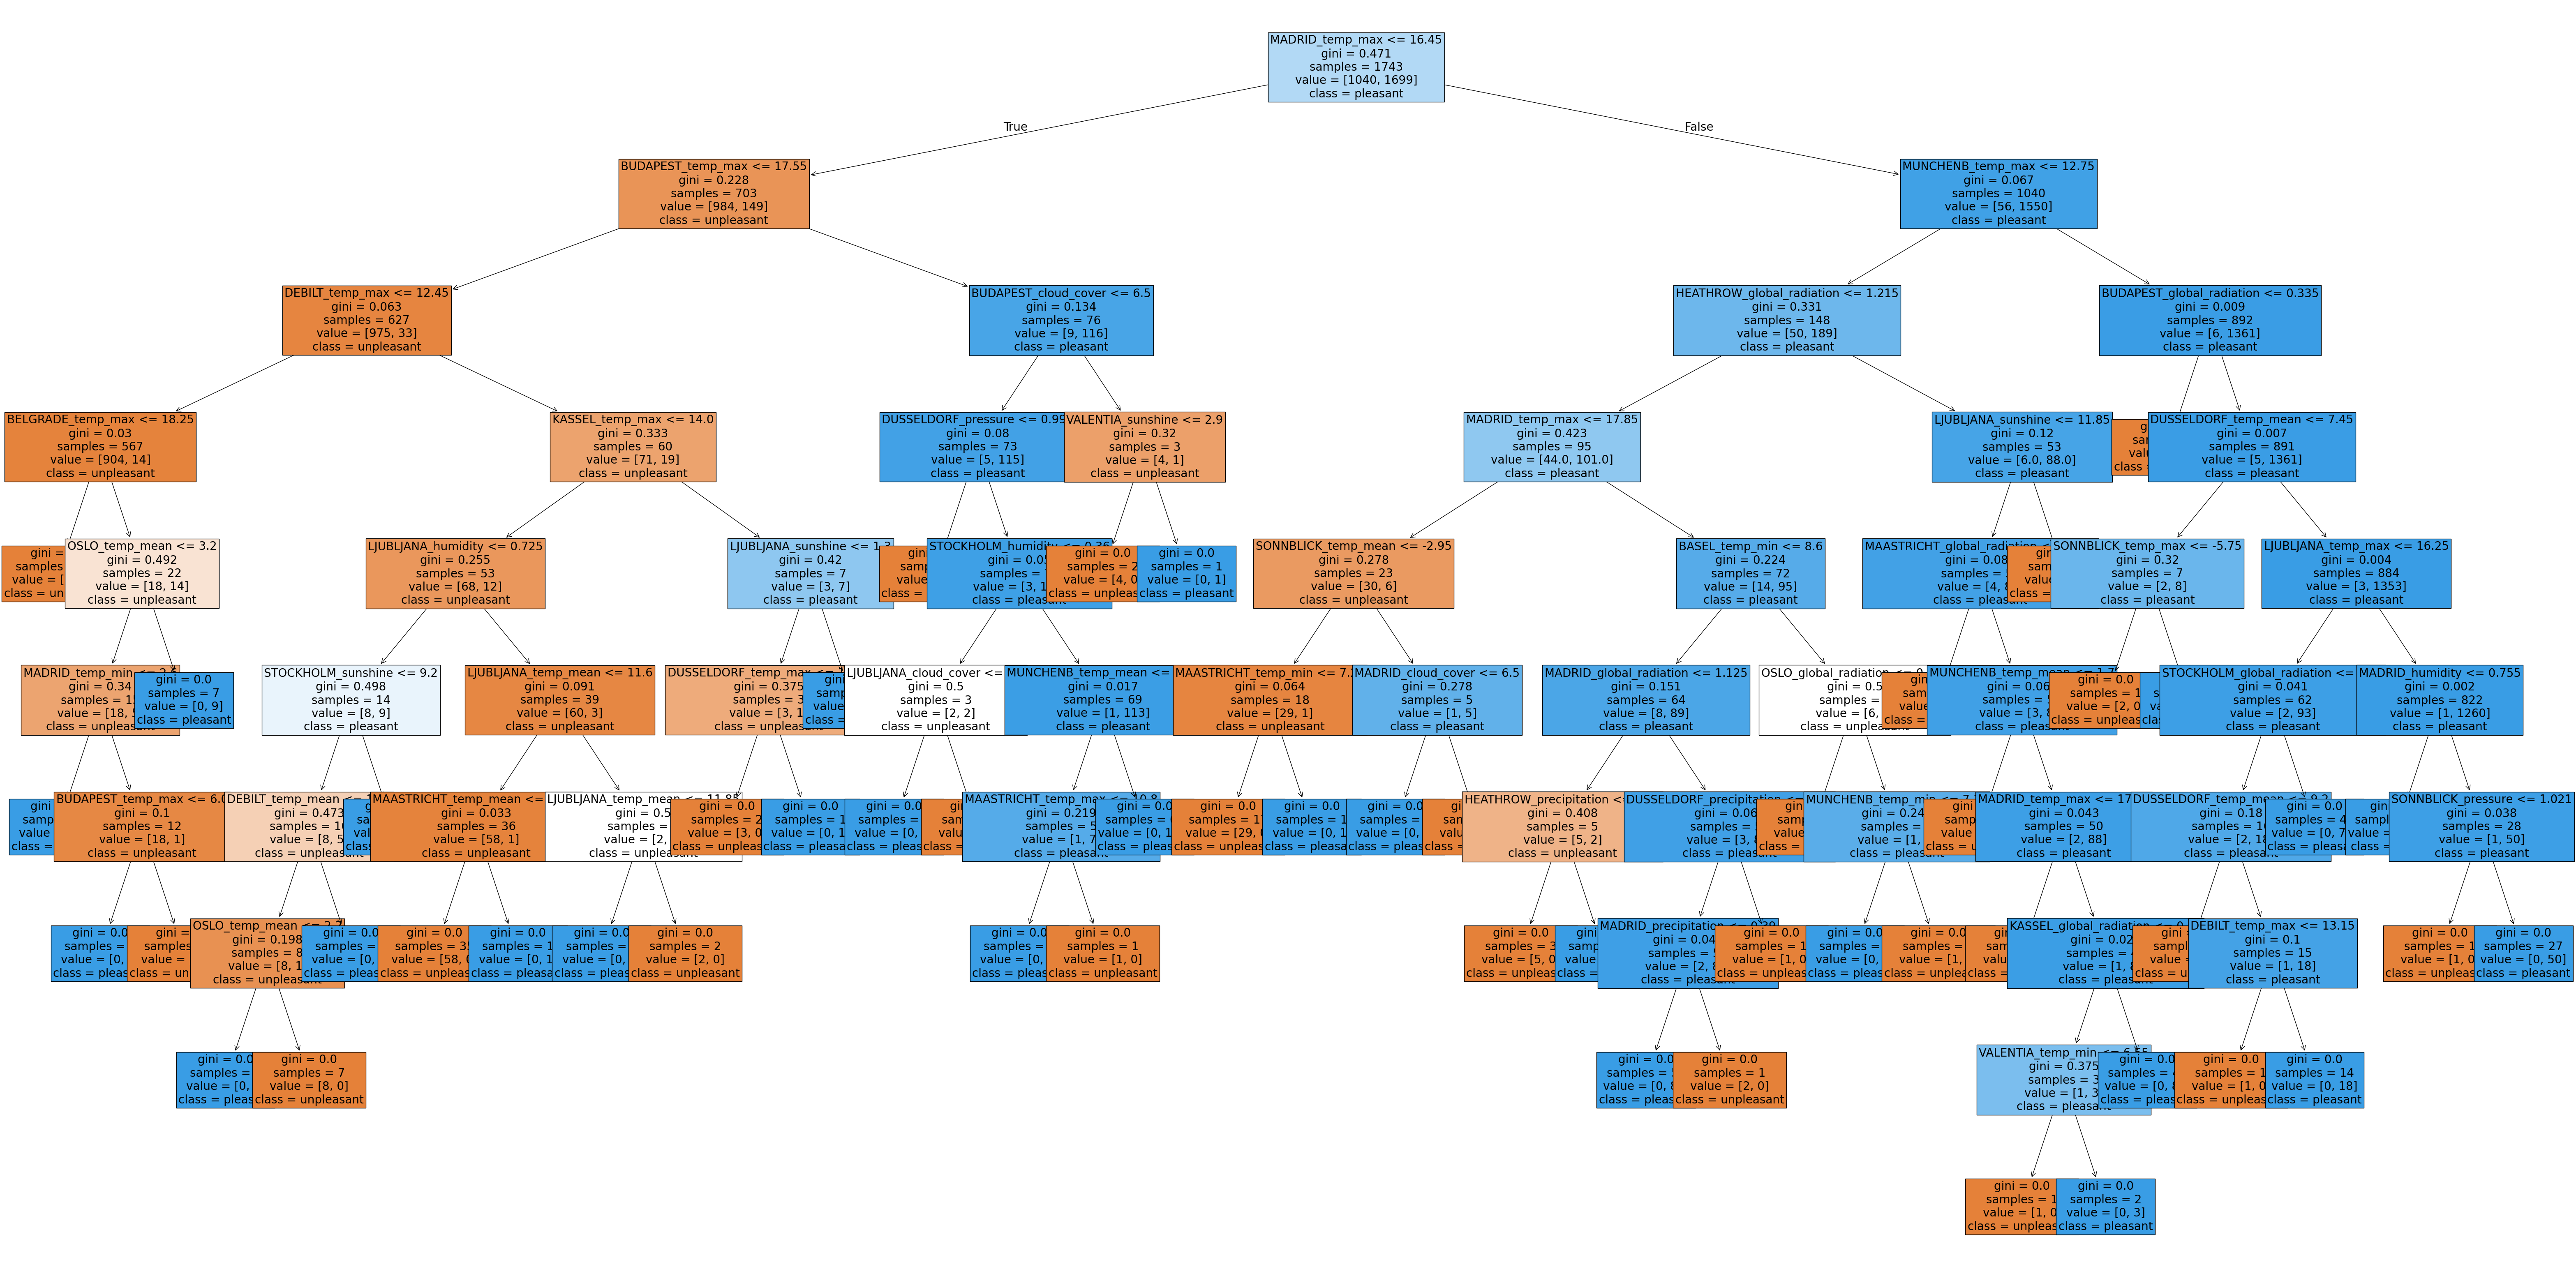

In [61]:
# Plot random forest (2010s)
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=df_2010s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [62]:
rf_1.savefig(os.path.join(path, 'Analysis','random_forest_2010s.png'),bbox_inches='tight')

#### Random Forest 2 (2000s Data)

In [63]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [64]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9595185995623632


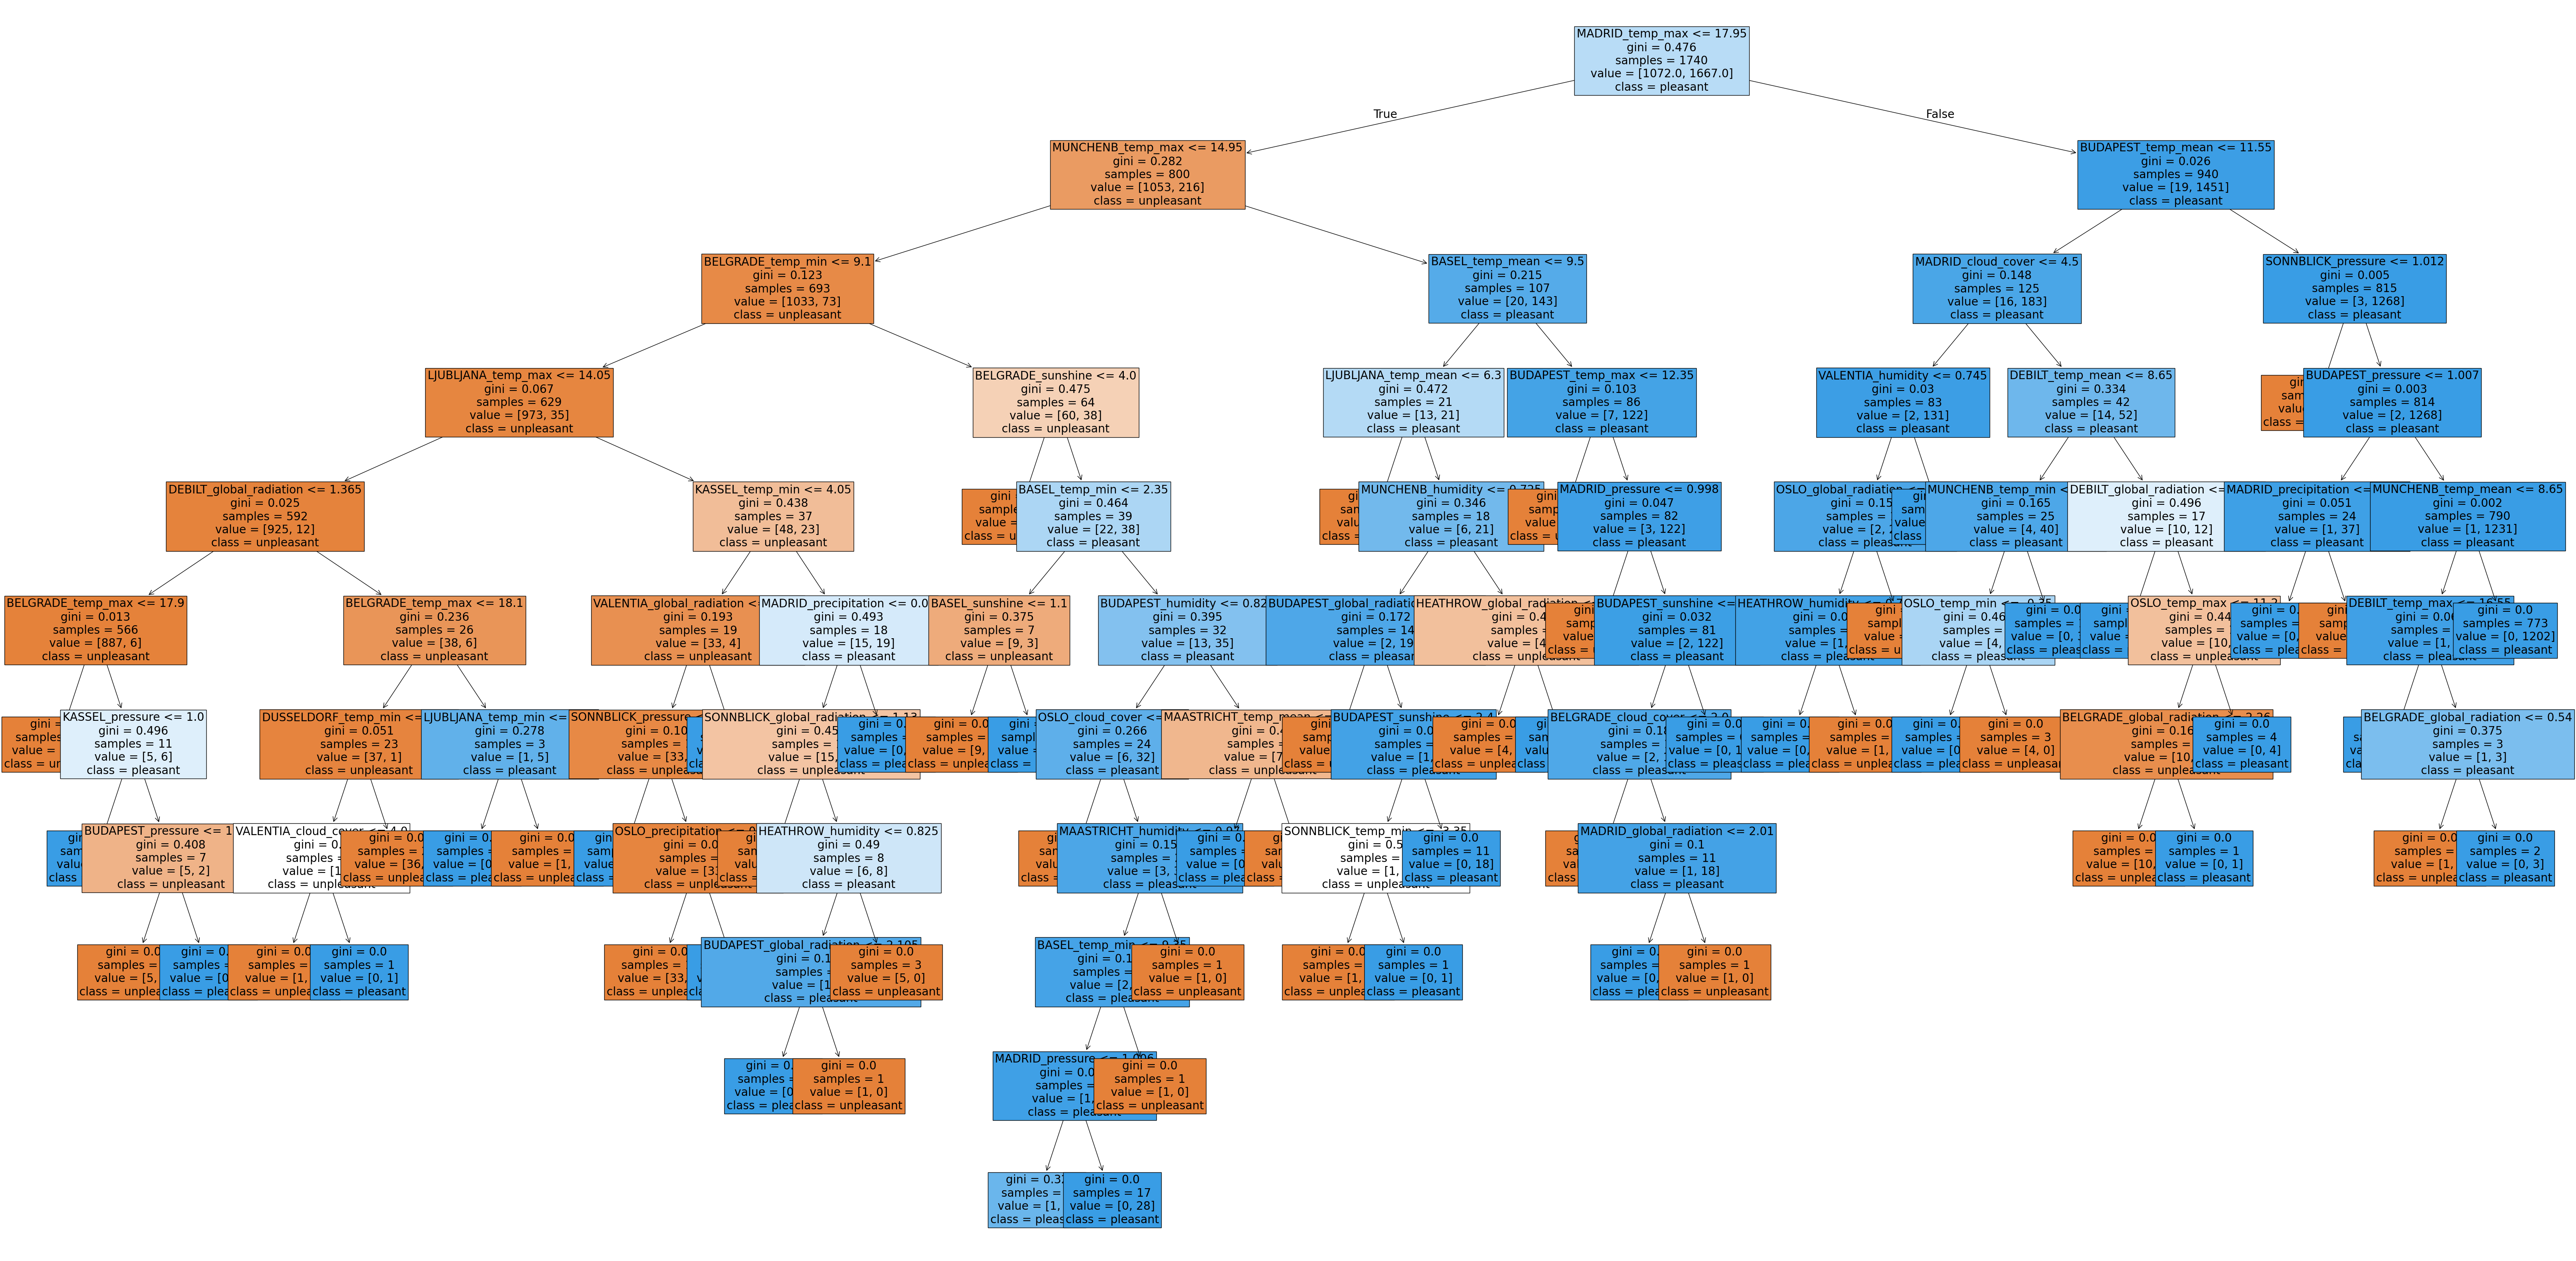

In [65]:
# Plot random forest (2010s)
rf_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_2000s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [66]:
rf_1.savefig(os.path.join(path, 'Analysis','random_forest_2000s.png'),bbox_inches='tight')

### 04. Uncovering Feature Importances

### 2010 Data

In [67]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [5.81345906e-04 7.24549645e-04 1.48462303e-03 3.51674092e-03
 3.35007665e-04 6.52540626e-04 5.72093757e-02 1.21634703e-03
 1.37957326e-02 1.04989353e-03 2.04540295e-03 1.79486729e-03
 1.56672705e-03 2.70908226e-03 1.16633073e-03 1.61964842e-02
 3.07484294e-03 1.39406350e-02 2.50330503e-04 0.00000000e+00
 0.00000000e+00 1.26281225e-03 7.32240151e-04 7.48785015e-04
 4.54220771e-02 1.01148864e-02 4.58328304e-02 5.52060473e-04
 6.84623238e-04 8.63236888e-04 2.06631576e-03 5.25837531e-04
 1.22589411e-03 1.99666833e-02 1.35363048e-03 2.04872361e-02
 6.97791989e-04 9.15846185e-04 1.04322647e-03 9.99013140e-03
 4.38497801e-04 6.93790917e-04 1.69737168e-02 1.70956896e-03
 1.70631715e-02 4.01832975e-04 1.09095386e-03 1.44784824e-03
 3.45993538e-03 5.02972644e-04 1.08308145e-03 9.64848597e-03
 5.34861793e-03 1.72827199e-02 4.21633071e-04 7.27986900e-04
 3.41278736e-04 3.97790681e-04 5.23273318e-04 2.74916639e-03
 6.77566391e-04 7.78289064e-04 4.46898801e-04 1.76057603e-03
 1.

In [68]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [69]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.07951626 0.04354427 0.10436396 0.04772552 0.04952574 0.04026645
 0.00706388 0.12874695 0.04911083 0.26015314 0.07946777 0.05470248
 0.01988427 0.02952    0.00640848]


In [70]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [71]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [72]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.260153
7        LJUBLJANA    0.128747
2         BUDAPEST    0.104364
0            BASEL    0.079516
10        MUNCHENB    0.079468
11            OSLO    0.054702
4       DUSSELDORF    0.049526
8       MAASTRICHT    0.049111
3           DEBILT    0.047726
1         BELGRADE    0.043544
5         HEATHROW    0.040266
13       STOCKHOLM    0.029520
12       SONNBLICK    0.019884
6           KASSEL    0.007064
14        VALENTIA    0.006408


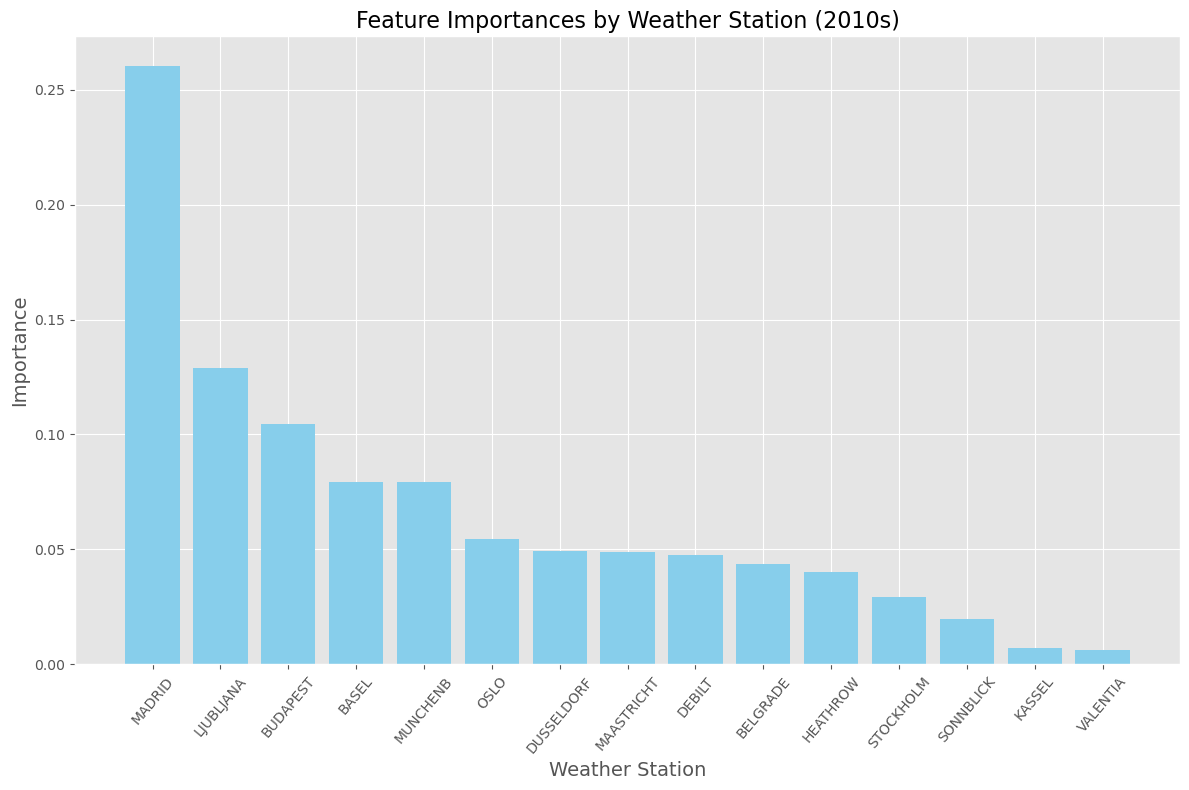

In [73]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

In [74]:
plt_1.savefig(os.path.join(path, 'Analysis','feature_importances_2010s.png'),bbox_inches='tight')

#### 2000s Data

In [75]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [0.00037547 0.00117798 0.00134773 0.00307814 0.00078432 0.00108602
 0.04198842 0.00150751 0.01840309 0.00124497 0.00434562 0.00164529
 0.00779411 0.00284621 0.00166977 0.04798553 0.008943   0.04055954
 0.00062064 0.00199694 0.00143162 0.00538178 0.00122745 0.00229202
 0.03023862 0.01734696 0.06203783 0.00065545 0.00100449 0.00102249
 0.00184378 0.00052044 0.00051223 0.00172935 0.00132911 0.01872041
 0.0007989  0.00120094 0.00112901 0.00335877 0.000545   0.00124114
 0.00664723 0.00093069 0.01494071 0.00058436 0.00127045 0.00135792
 0.00311457 0.00076422 0.00105249 0.00189484 0.00154025 0.01423055
 0.00108077 0.00102577 0.00765417 0.00098339 0.00147622 0.02110201
 0.01144264 0.03575474 0.00051    0.00126032 0.00127525 0.0036082
 0.00077566 0.00097717 0.06480445 0.00139752 0.02765984 0.00040662
 0.00099743 0.00106255 0.00279676 0.00061679 0.00106134 0.01309911
 0.00282341 0.02030609 0.00141281 0.00455981 0.00432659 0.00823902
 0.00193231 0.00366307 0.07742217 0.027910

In [76]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [77]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.06974868 0.11703402 0.12257386 0.02733775 0.03079238 0.02580964
 0.08102972 0.10216503 0.04417629 0.2260826  0.0604236  0.02275692
 0.01334469 0.04391042 0.0128144 ]


In [78]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [79]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.226083
2         BUDAPEST    0.122574
1         BELGRADE    0.117034
7        LJUBLJANA    0.102165
6           KASSEL    0.081030
0            BASEL    0.069749
10        MUNCHENB    0.060424
8       MAASTRICHT    0.044176
13       STOCKHOLM    0.043910
4       DUSSELDORF    0.030792
3           DEBILT    0.027338
5         HEATHROW    0.025810
11            OSLO    0.022757
12       SONNBLICK    0.013345
14        VALENTIA    0.012814


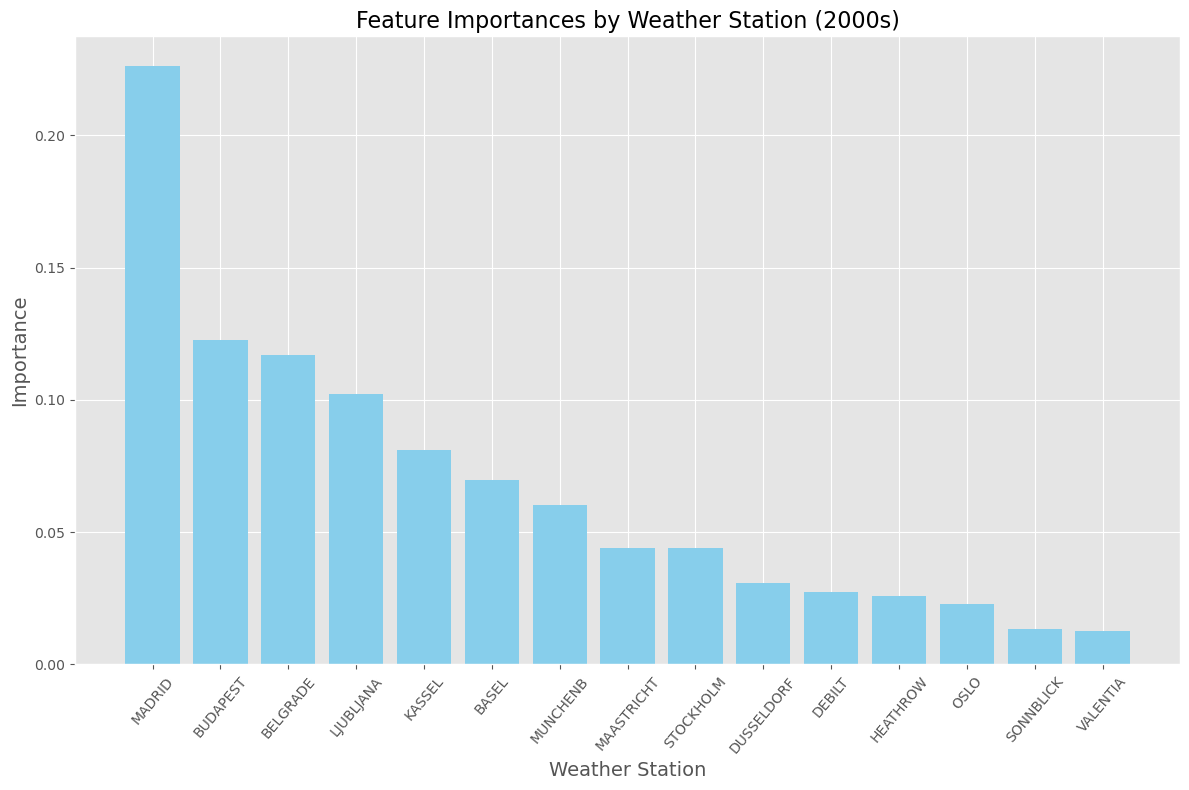

In [80]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

In [81]:
plt_2.savefig(os.path.join(path, 'Analysis', 'feature_importances_2000s.png'),bbox_inches='tight')

#### 05. Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importances

In [82]:
# Filter weather dataset to only include Madrid
df_mad = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8

In [83]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head(1)

MADRID_pleasant_weather
0                        0

In [84]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [85]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [86]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [87]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [88]:
# Create X matrix
X_3 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [89]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Creating Random Forest for Madrid**

In [90]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [91]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.996514464970373


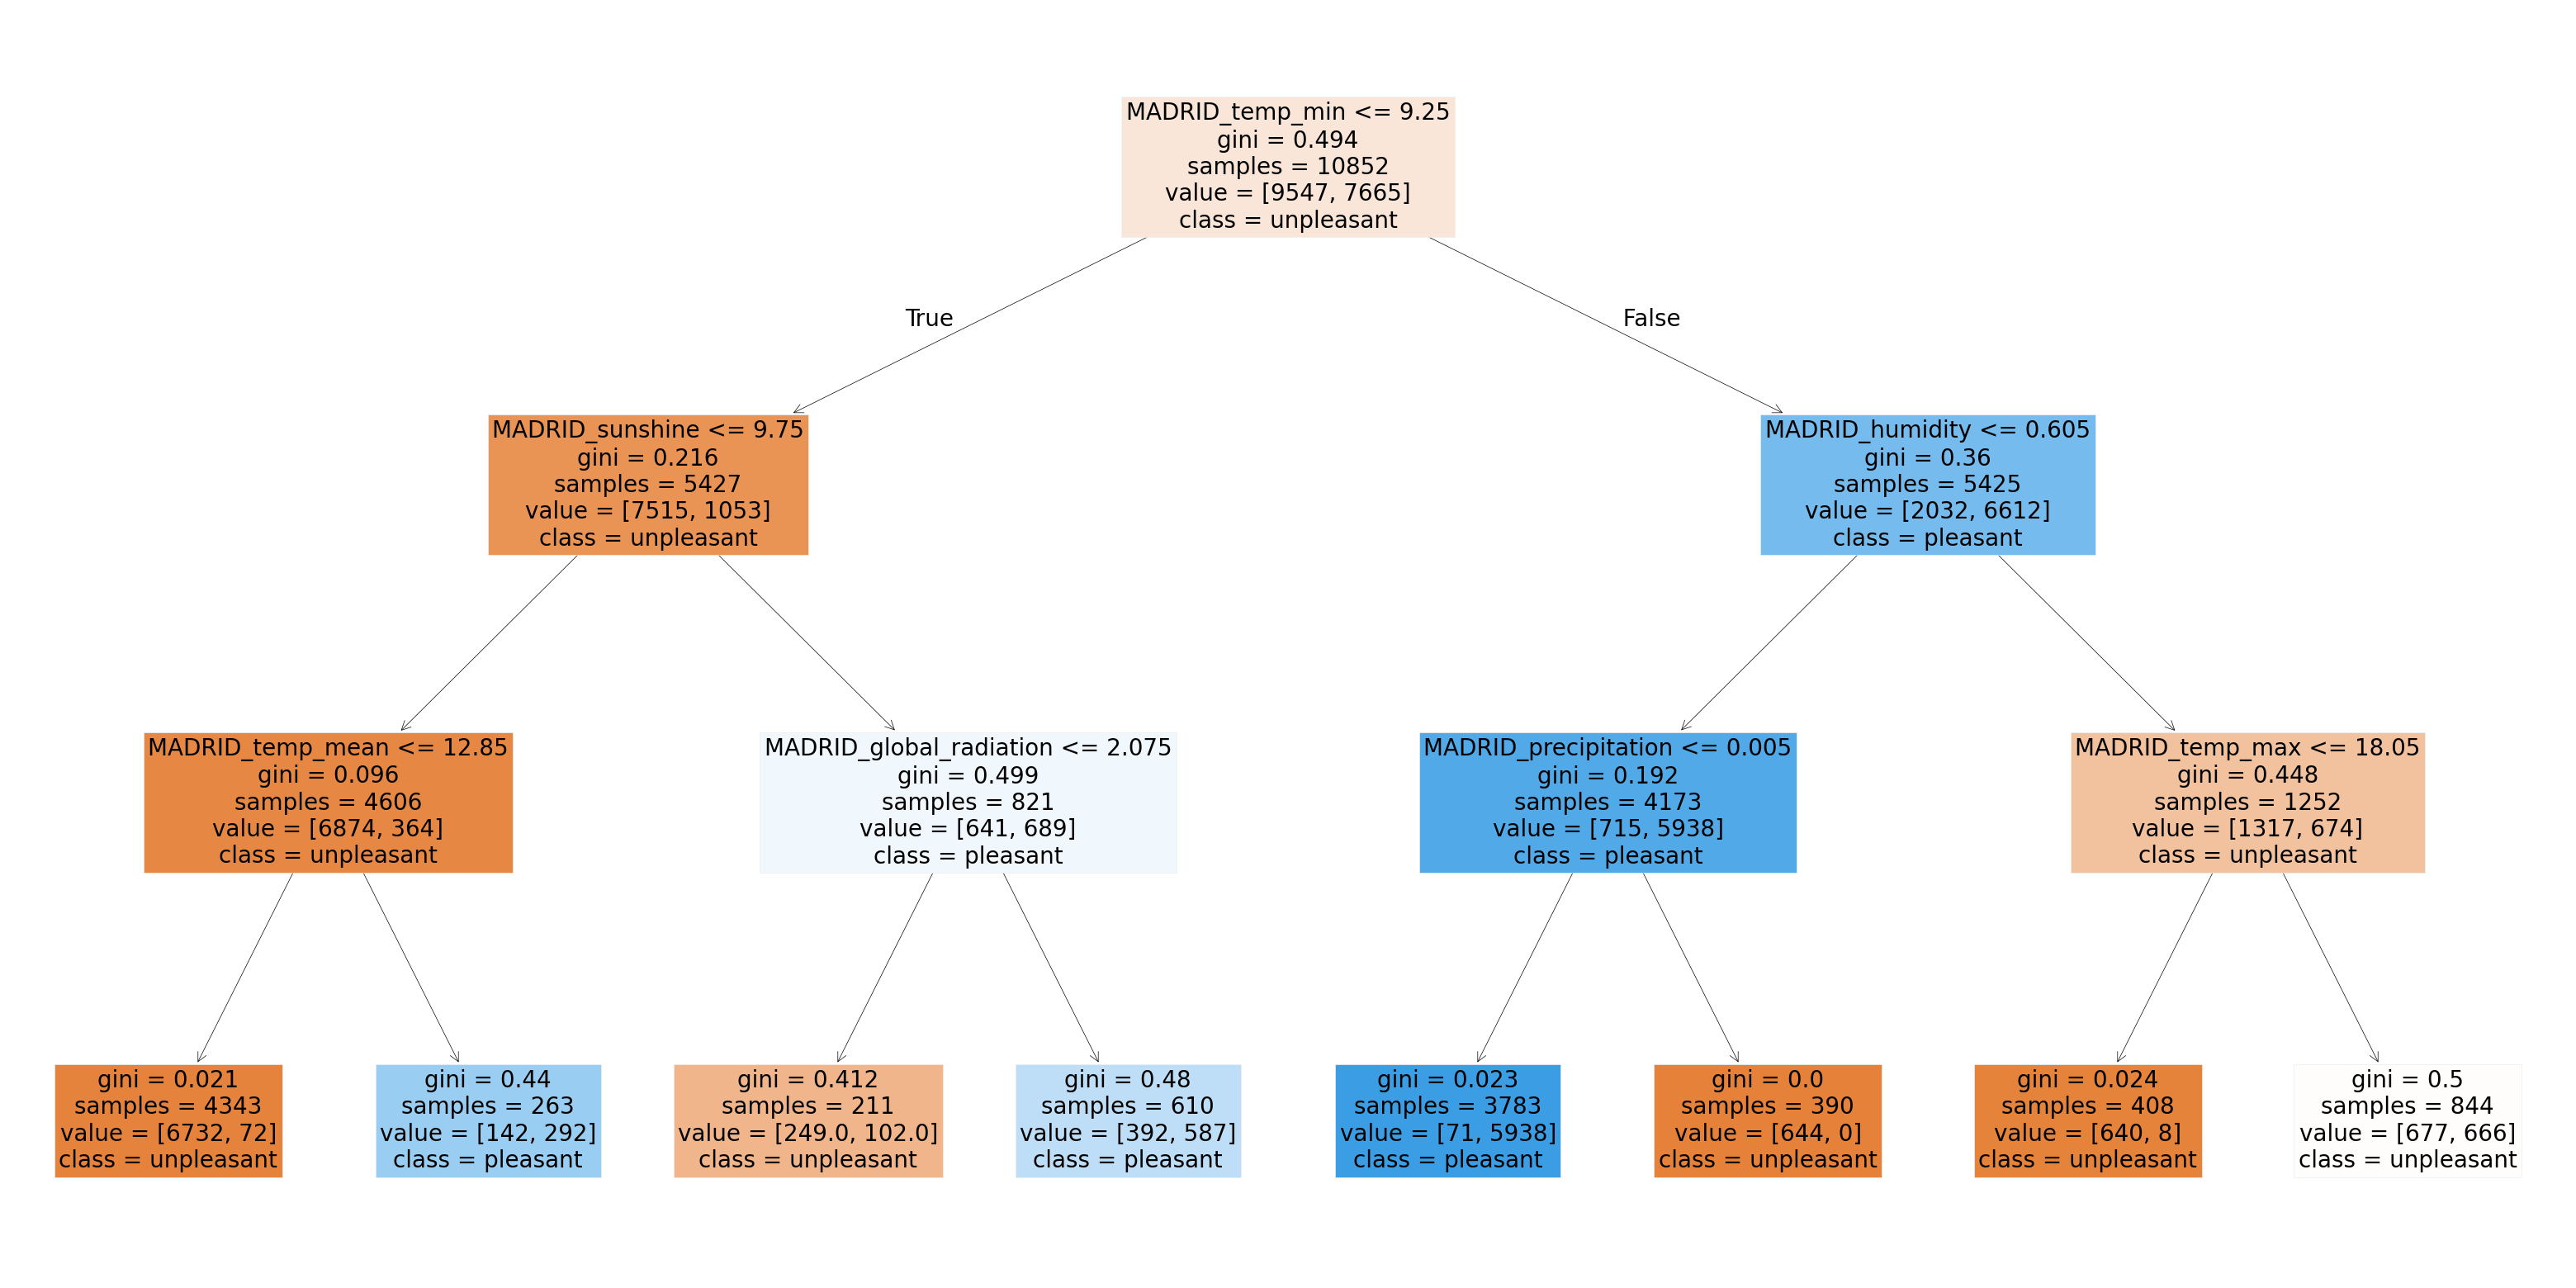

In [92]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [93]:
# Export the plot
rf_3.savefig(os.path.join(path, 'Analysis', 'random_forest_madrid.png'),bbox_inches='tight')

**Listing Feature Importances**

In [94]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.01540721 0.03741818 0.00049545 0.06033261 0.13580941 0.10076798
 0.25339673 0.09023906 0.30613336]
(9,)


In [95]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [96]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [97]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.306133
6         temp_mean    0.253397
4     precipitation    0.135809
5          sunshine    0.100768
7          temp_min    0.090239
3  global_radiation    0.060333
1          humidity    0.037418
0       cloud_cover    0.015407
2          pressure    0.000495


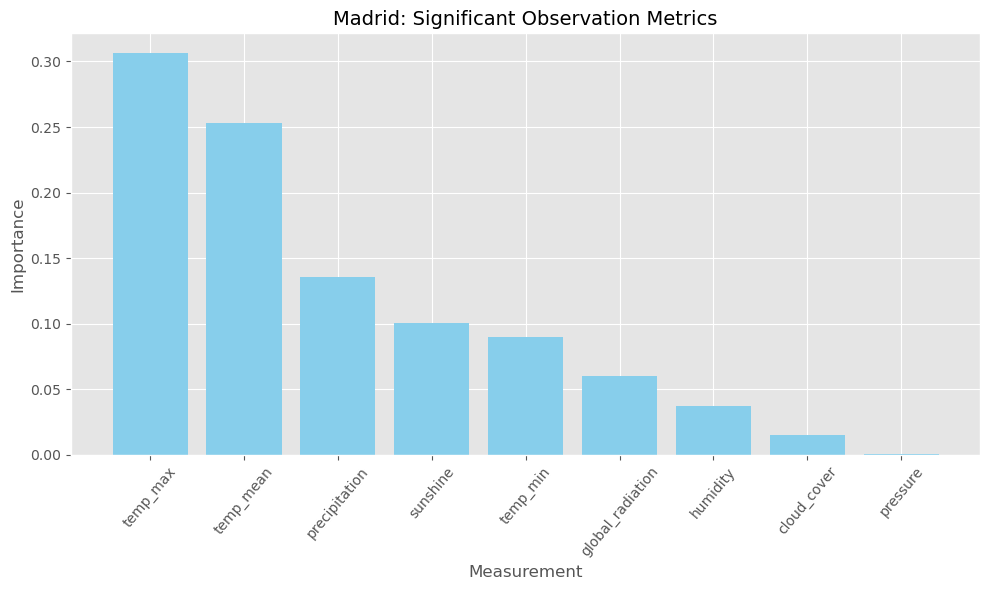

In [98]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

### Budapest

#### Preprocessing the Data for Budapest

In [100]:
# Filter weather dataset to only include Budapest
df_bud = df[df.columns[df.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_bud.head(1)

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1

In [102]:
# Filter pleasant dataset to only include Budapest
bud_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
bud_pleasant.head(1)

BUDAPEST_pleasant_weather
0                          0

In [103]:
# Check shape
print(df_bud.shape)
print(bud_pleasant.shape)

(22950, 9)
(22950, 1)


In [104]:
# Create matrices
y_4 = bud_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [105]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [106]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [107]:
# Create X matrix
X_4 = df_bud.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [108]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### Creating a Random Forest for Budapest

In [109]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [110]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9959916347159289


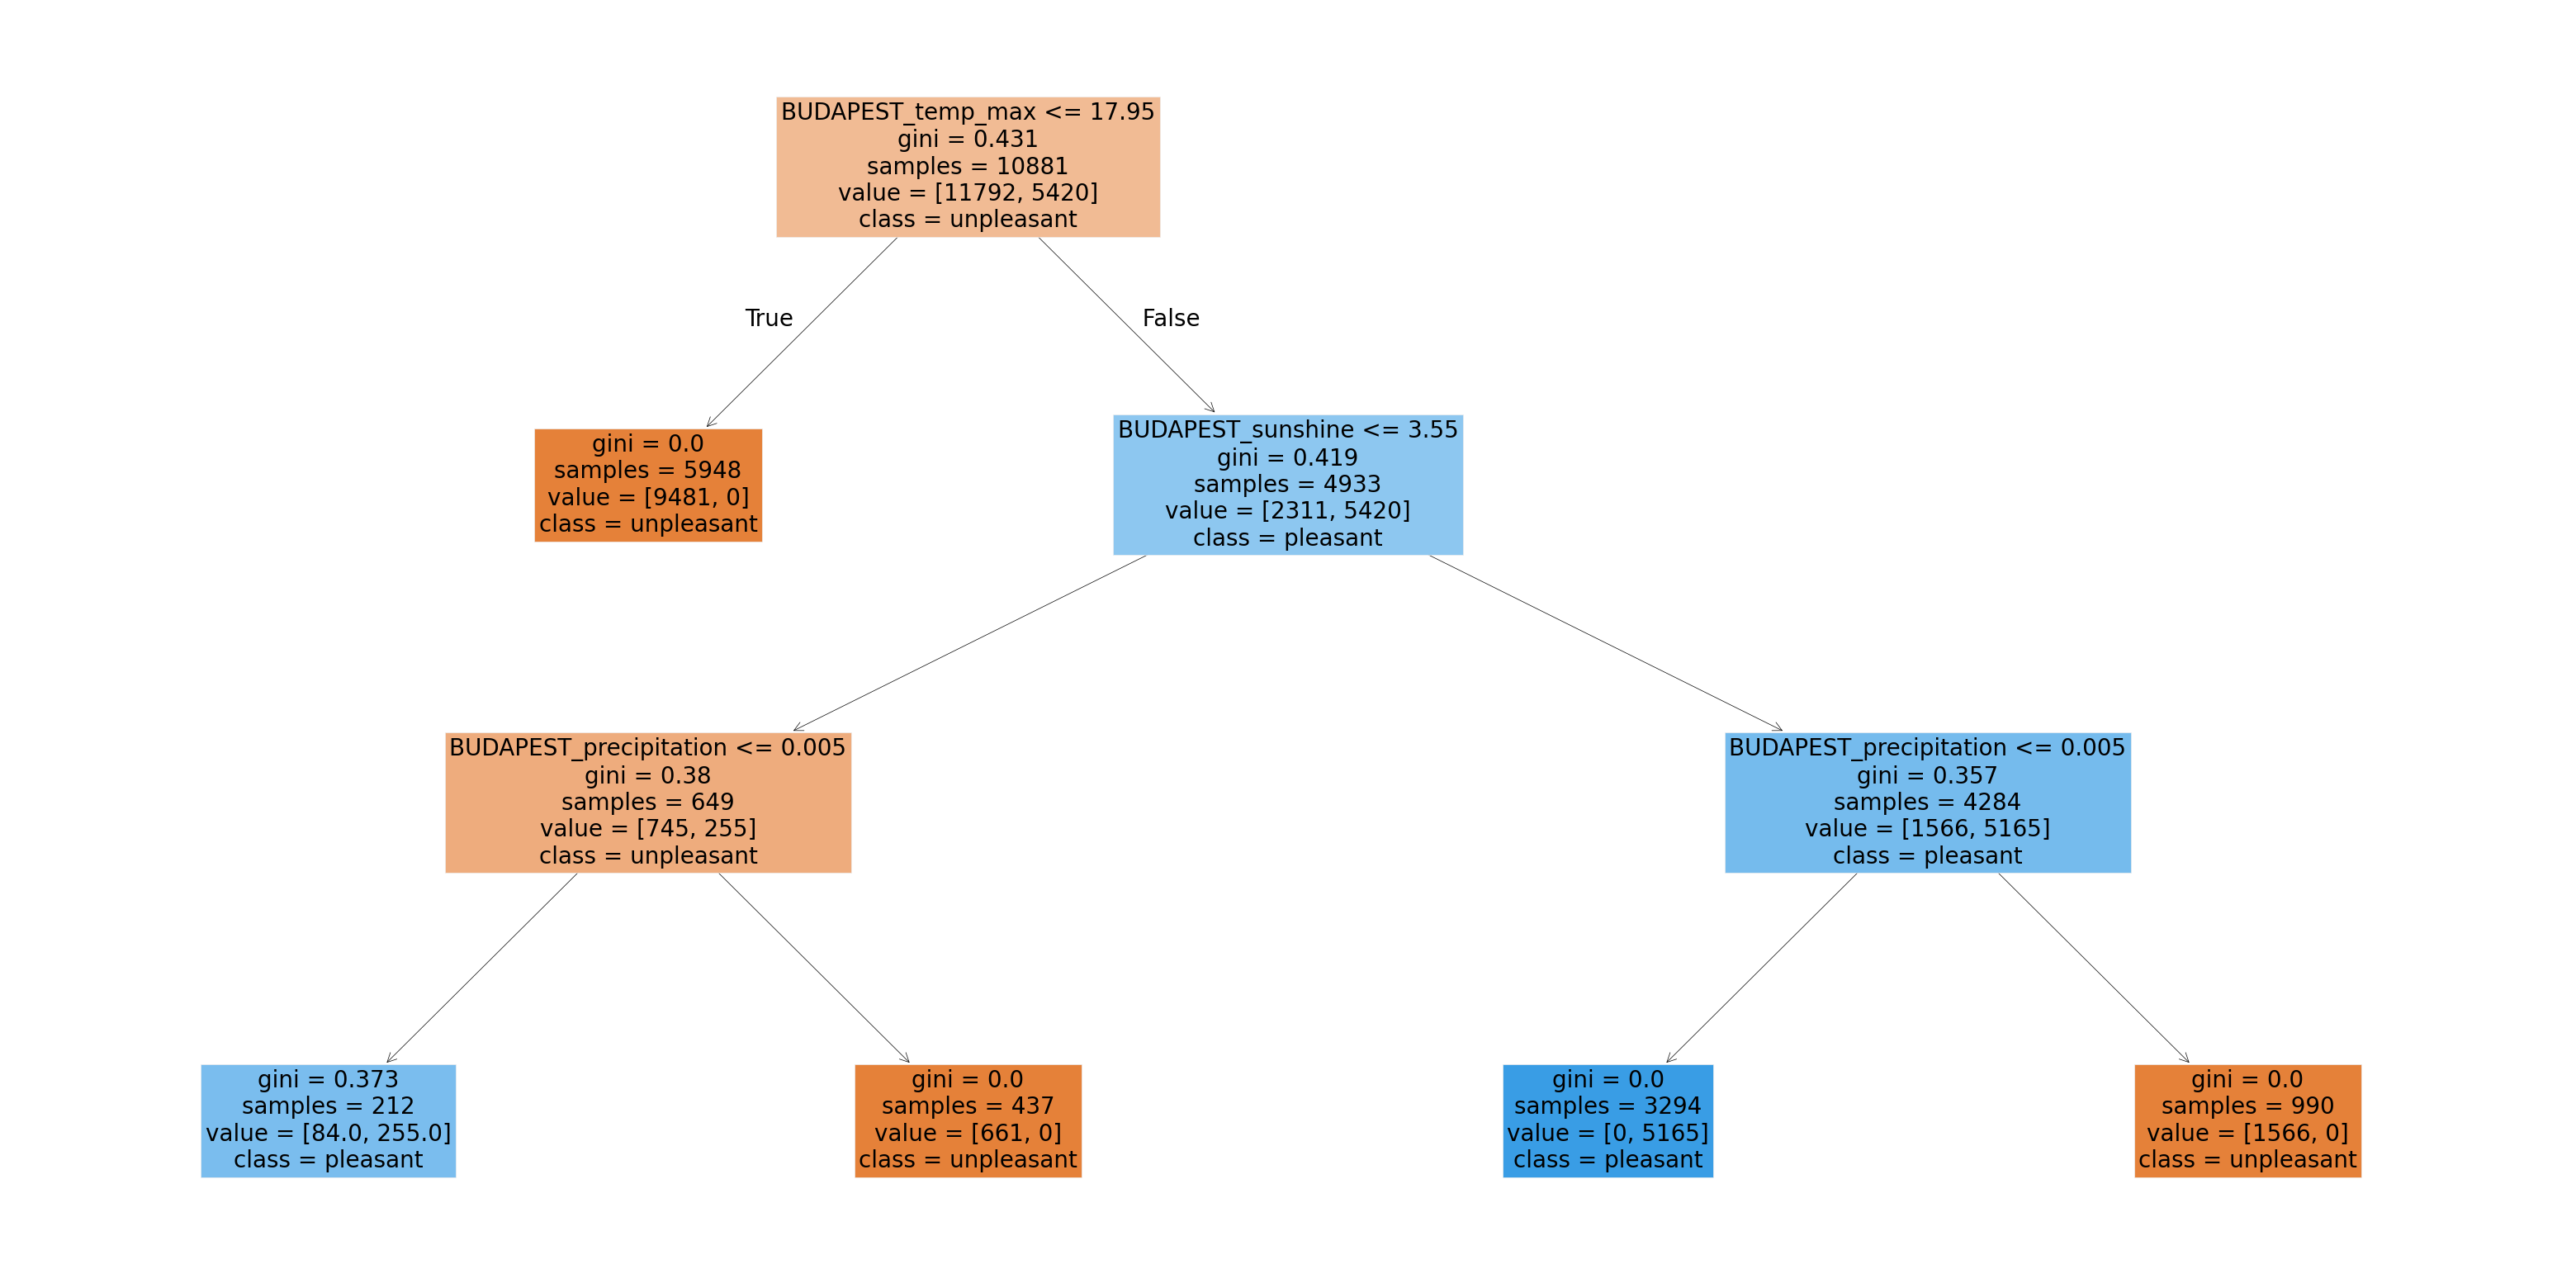

In [111]:
# Plot random forest (Budapest)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [113]:
rf_4.savefig(os.path.join(path, 'Analysis', 'random_forest_budapest.png'),bbox_inches='tight')

#### Listing Feature Importances

In [114]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.01558338 0.00510194 0.00116942 0.07599636 0.25619267 0.05873418
 0.14978226 0.09142597 0.34601382]
(9,)


In [115]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [116]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.346014
4     precipitation    0.256193
6         temp_mean    0.149782
7          temp_min    0.091426
3  global_radiation    0.075996
5          sunshine    0.058734
0       cloud_cover    0.015583
1          humidity    0.005102
2          pressure    0.001169


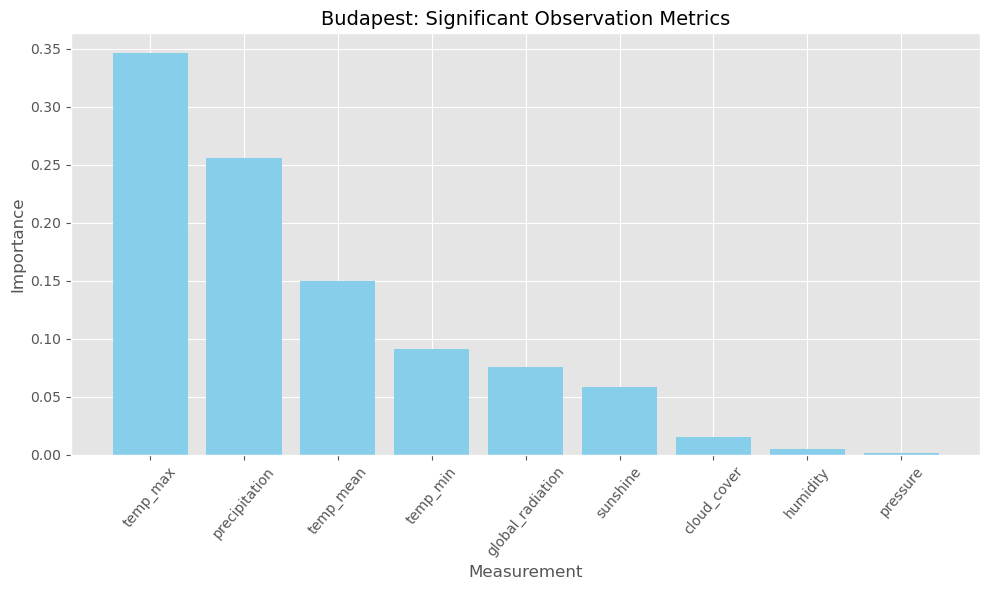

In [117]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

#### Ljubljana

#### Processing the data for Ljubljana

In [119]:
# Filter weather dataset to only include Budapest
df_ljub = df[df.columns[df.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
df_ljub.head(1)

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                 1.0              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                         0.2                      0.0                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  
0                 -0.6                -1.9                 0.5

In [121]:
# Filter pleasant dataset to only include Ljubljana
ljub_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
ljub_pleasant.head(1)

LJUBLJANA_pleasant_weather
0                           0

In [122]:
# Check shape
print(df_ljub.shape)
print(ljub_pleasant.shape)

(22950, 9)
(22950, 1)


In [123]:
# Create matrices
y_5 = ljub_pleasant.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [124]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [125]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [126]:
# Create X matrix
X_5 = df_ljub.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [127]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=127)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### Creating a Random Forest for Ljubljana

In [128]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [129]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9982572324851865


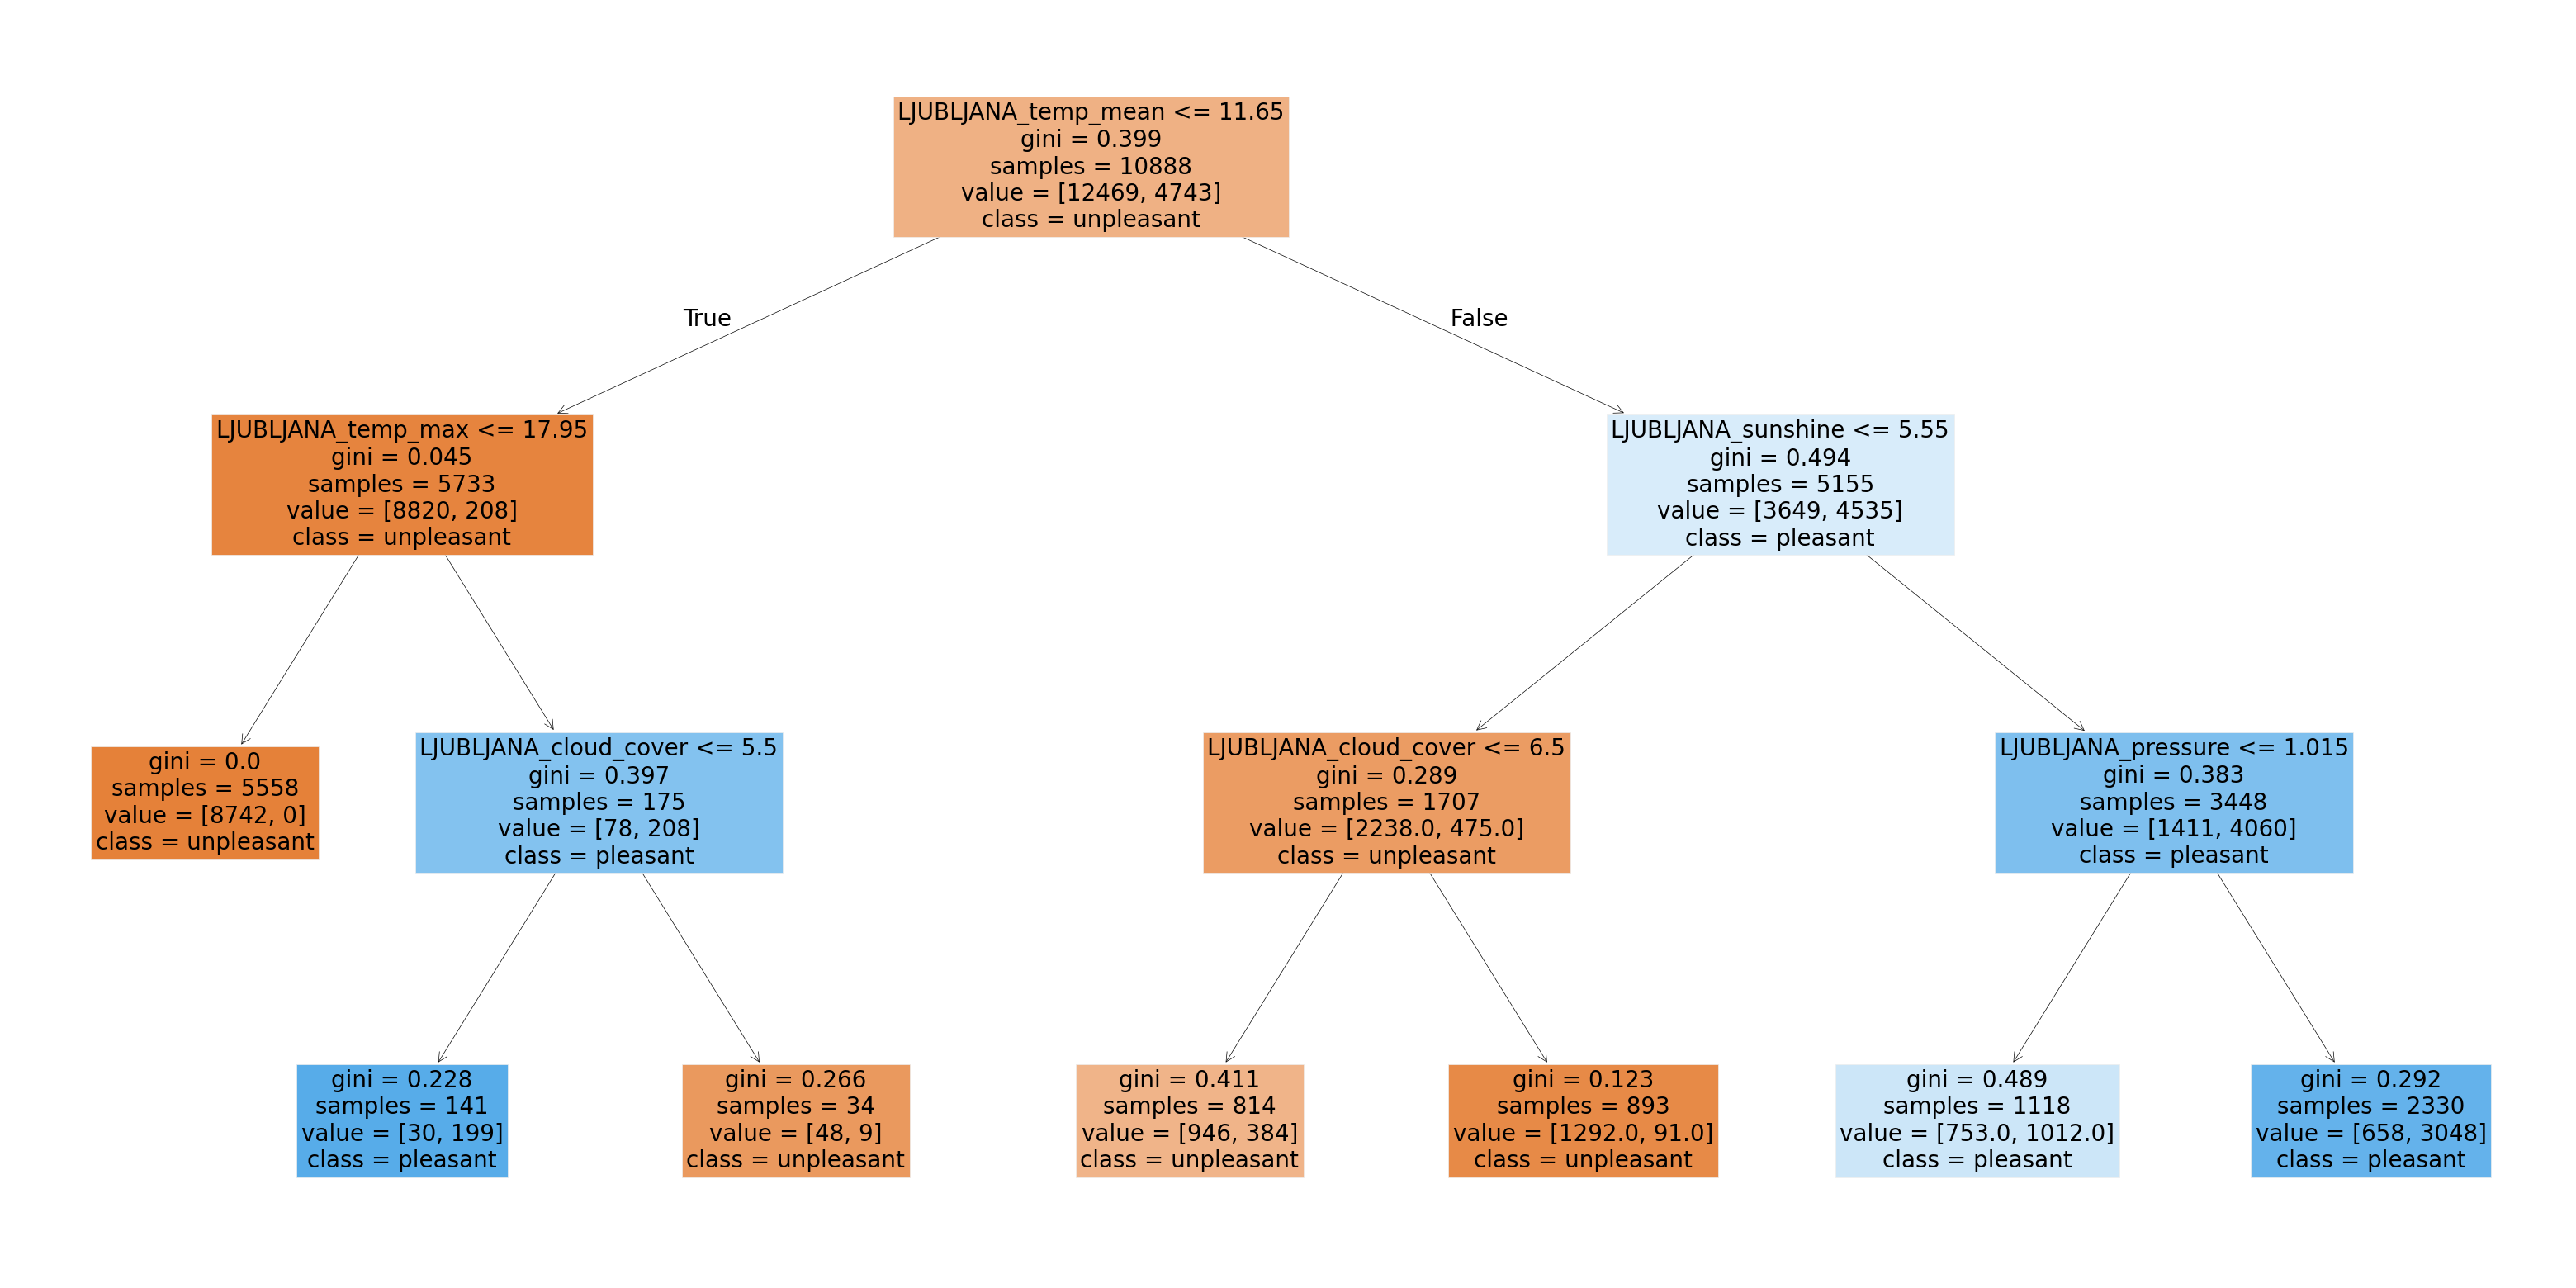

In [130]:
# Plot random forest (Ljubljana)
rf_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_ljub.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [132]:
# Export plot
rf_5.savefig(os.path.join(path, 'Analysis', 'random_forest_ljubljana.png'),bbox_inches='tight')

#### Listing Feature Importances

In [133]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.04103405 0.01609048 0.00506061 0.1617003  0.26196337 0.10342701
 0.12280454 0.02265598 0.26526366]
(9,)


In [134]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [135]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
8          temp_max    0.265264
4     precipitation    0.261963
3  global_radiation    0.161700
6         temp_mean    0.122805
5          sunshine    0.103427
0       cloud_cover    0.041034
7          temp_min    0.022656
1          humidity    0.016090
2          pressure    0.005061


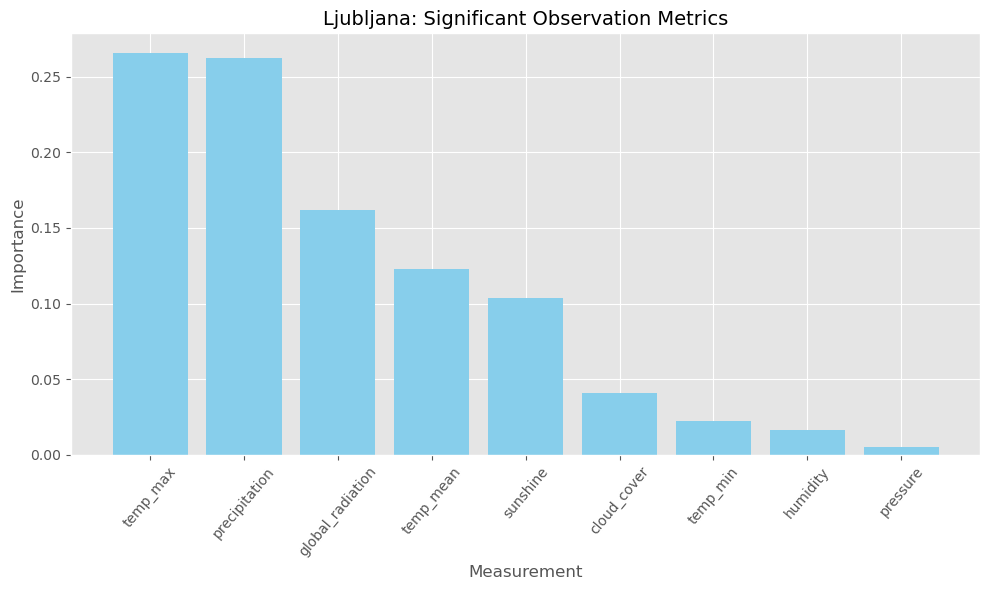

In [136]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()